# Library Usage in Seattle, 2005-2020

## Exploratory Data Analysis

The data that is the basis for this project is the [Checkouts by Title (Physical Items)](https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff) dataset from [Seattle Open Data](https://data.seattle.gov/). It was downloaded on December 15, 2020.

This notebook uses two datasets that were created in the [previous notebook](01_data_cleaning.ipynb), which I use to explore and analyze the types of items and the quantities of those items that were checked out from the Seattle Library system between 2005 and 2020.

## Table of contents

1. [Import required packages](#Import-required-packages)
2. [Load data](#Load-data)

### Import required packages

In [1]:
# standard dataframe packages
import pandas as pd
import numpy as np

# graphing packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

# custom functions
from functions.data_cleaning import *

# reload functions/libraries when edited
%load_ext autoreload
%autoreload 2

### Load data

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

I'll load both the complete item checkouts data, as well as the item counts data, here. Again, these were created in the [previous notebook](01_data_cleaning.ipynb).

#### ⏰ Cell below takes 20-25 minutes to run. ⏰

In [2]:
%%time

# uncomment to load complete item checkouts data
df_full = load_multi_df(
    'data/', 'seattle_lib_', 'pkl', 11, compression='gzip', verbose=1
)

Current time = 13:40:06
-----------------------
Begin load...

Current time = 14:02:51
-----------------------
Load complete!

CPU times: user 3min 37s, sys: 10min 19s, total: 13min 57s
Wall time: 22min 53s


In [4]:
# take a look
df_full.head()

,title,subjects,date,format_group,format_subgroup,category_group,age_group
0,Firewall,"Kidnapping Drama, Video recordings for the hea...",2008-02-13,Media,Video Disc,Fiction,Adult
1,Marley me,"Comedy films, Married people Drama, Philadelph...",2009-07-03,Media,Video Disc,Fiction,Adult
2,Six feet under The complete fourth season,"Video recordings for the hearing impaired, Pro...",2008-10-26,Media,Video Disc,Fiction,Adult
3,Doctor Who The next doctor,"London England Drama, Doctor Who Fictitious ch...",2010-11-10,Media,Video Disc,Fiction,Adult
4,School ties,"Antisemitism Drama, Video recordings for the h...",2008-12-28,Media,Video Disc,Fiction,Adult


In [3]:
# uncomment to load item counts data
df_counts = pd.read_pickle('data/seattle_lib_counts.pkl', compression='gzip')

In [5]:
# take a look
df_counts.head()

,total_checkouts,missing_title,missing_subjects,format_group_Equipment,format_group_Media,format_group_Other,format_group_Print,format_subgroup_Art,format_subgroup_Audio Disc,format_subgroup_Audio Tape,...,format_subgroup_Video Tape,category_group_Fiction,category_group_Interlibrary Loan,category_group_Language,category_group_Nonfiction,category_group_Other,category_group_Reference,age_group_Adult,age_group_Juvenile,age_group_Teen
date,,,,,,,,,,,,,,,,,,,,,
2005-04-13,16471,212,664,1.0,6397.0,32.0,10041.0,0.0,1874.0,63.0,...,1878.0,8189.0,32.0,370.0,6719.0,1143.0,18.0,11257.0,4613.0,601.0
2005-04-14,10358,123,541,1.0,4015.0,75.0,6267.0,0.0,1245.0,31.0,...,1115.0,5276.0,73.0,272.0,4104.0,621.0,12.0,6726.0,3381.0,251.0
2005-04-15,12896,179,508,0.0,5351.0,51.0,7494.0,0.0,1462.0,54.0,...,1721.0,6357.0,50.0,302.0,5166.0,1014.0,7.0,8795.0,3747.0,354.0
2005-04-16,1358,7,56,0.0,552.0,0.0,806.0,0.0,175.0,8.0,...,163.0,567.0,0.0,29.0,666.0,95.0,1.0,950.0,367.0,41.0
2005-04-17,4555,80,232,0.0,1555.0,8.0,2992.0,0.0,499.0,10.0,...,480.0,2017.0,8.0,177.0,2145.0,203.0,5.0,3035.0,1349.0,171.0


In [7]:
df_full[df_full.format_group == 'Equipment'].head(10)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
19752051,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-09-01,Equipment,Kit,Nonfiction,Adult
19752202,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-15,Equipment,Kit,Nonfiction,Adult
19752518,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-09,Equipment,Kit,Nonfiction,Adult
19752679,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-22,Equipment,Kit,Nonfiction,Adult
19752807,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-11-23,Equipment,Kit,Nonfiction,Adult
19752884,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-12-09,Equipment,Kit,Nonfiction,Adult
19753114,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-10-28,Equipment,Kit,Nonfiction,Adult
19753541,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-12,Equipment,Kit,Nonfiction,Adult
19753614,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-17,Equipment,Kit,Nonfiction,Adult
19753933,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-29,Equipment,Kit,Nonfiction,Adult


### Analysis of `format_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [8]:
df_full.format_group.value_counts()

Print        59615970
Media        46618209
Other          200453
Equipment       69211
Name: format_group, dtype: int64

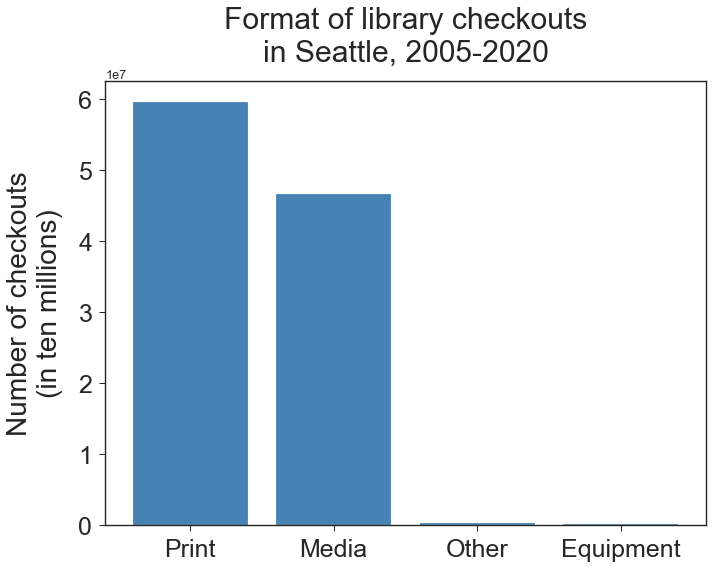

In [97]:
col_counts = df_full['format_group'].value_counts()

# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `format_subgroup`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

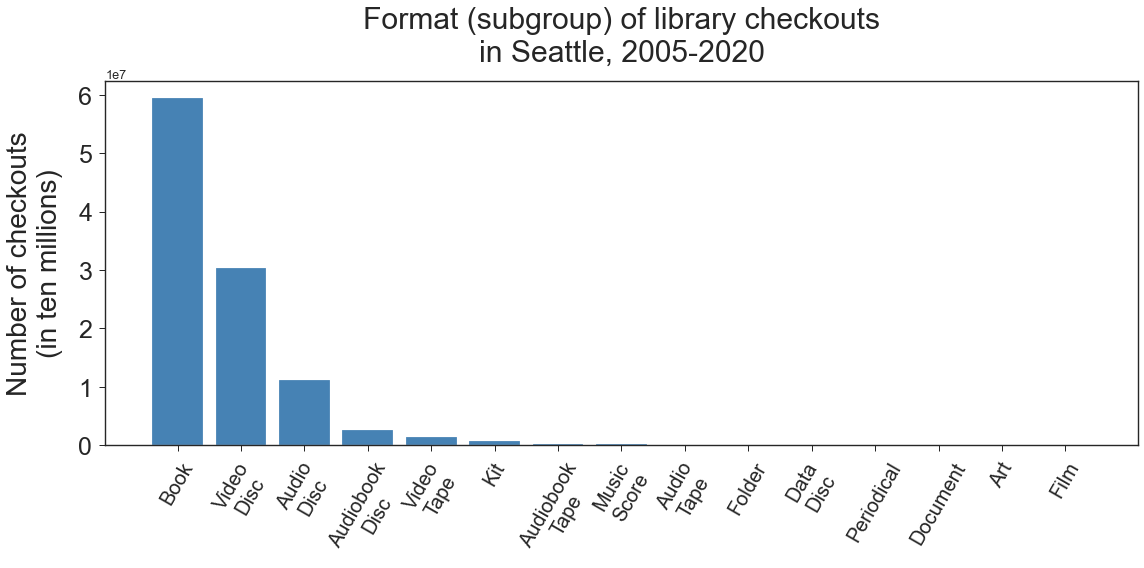

In [10]:
col_counts = df_full['format_subgroup'].value_counts()

# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_subgroup_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

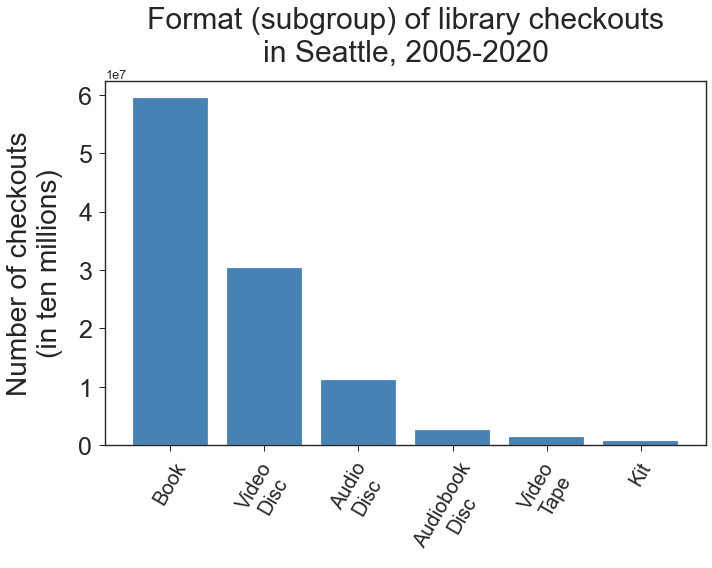

In [14]:
col_counts = df_full['format_subgroup'].value_counts().head(6)

# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_subgroup_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `category_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

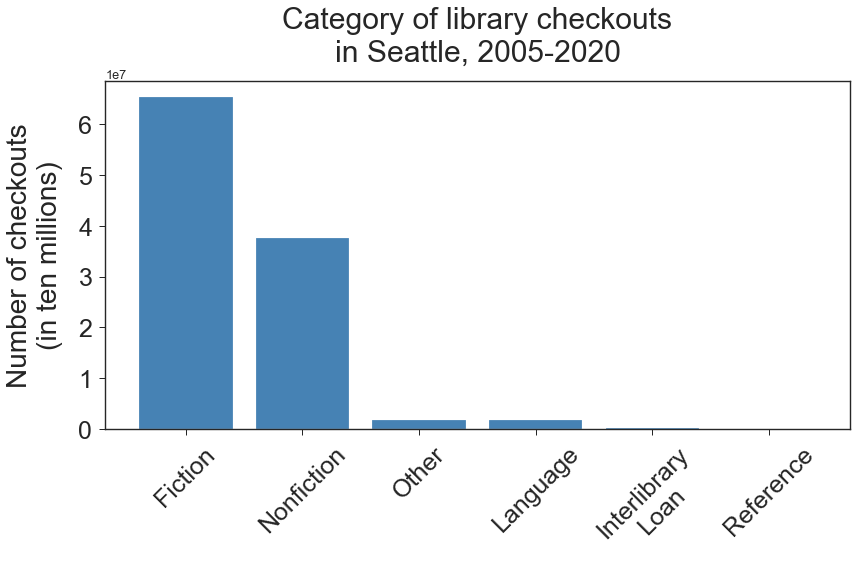

In [11]:
col_counts = df_full['category_group'].value_counts()

# prettify the plot
plt.figure(figsize=(12,8))
plt.title('Category of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Category', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(6), labels=labels_pretty, fontsize=25, rotation=45)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `age_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

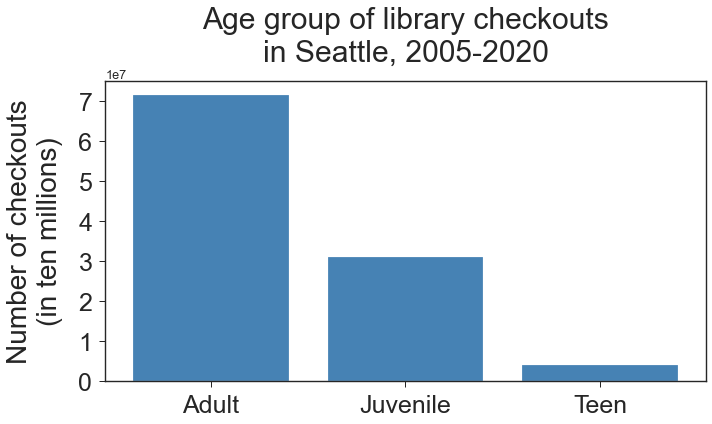

In [12]:
col_counts = df_full['age_group'].value_counts()

# prettify the plot
plt.figure(figsize=(10,6))
plt.title('Age group of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/age_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

## Most popular items

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [9]:
%%time

df_full.title.value_counts().head(50)

CPU times: user 33 s, sys: 5.82 s, total: 38.8 s
Wall time: 38.8 s


Greatest hits                                73907
SPL HotSpot connecting Seattle               34217
Into the wild                                25151
Uncataloged Folder or Bag BAL                22608
Uncataloged Folder or Bag DWN                22504
Harry Potter and the half blood prince       22389
Twilight                                     21363
Where the wild things are                    21359
kite runner                                  20864
golden compass                               20861
Harry Potter and the sorcerers stone         19867
No country for old men                       19784
FlexTech Laptops                             19577
Cinderella                                   19566
Harry Potter and the Order of the Phoenix    19063
reader                                       18933
hunger games                                 17707
Atonement                                    17476
Harry Potter and the goblet of fire          17446
Uncataloged Folder or Bag GWD  

Perhaps unsurprisingly, the top 50 titles are mostly comprised of items that are both books and movies, as well as more generic terms such as `Greatest hits`; thus, I will have to perform a closer look at each format type and some specific items.

#### Important notes:
- Equipment plays a large role in Seattle's libraries, namely `SPL HotSpot connecting Seattle`, `FlexTech Laptops`, and `In Building Device Checkout`
    - Perhaps analyzing this across time can lead to further insights
    - Libraries play a large role in folks accessing the internet
- Several items are marked as `Uncataloged Folder or Bag`, followed by the code for whichever branch they are a part of; perhaps more investigation will be necessary here
- `Darjeeling Limited` appears to be the top item for items that are only either a book or a movie, not both (in this case a movie by Wes Anderson)
- All but the final `Harry Potter` book/movie appear on the list, which may be due to the fact that:
    - as a book, it came out in July 2007 (after the start date of this data)
    - as a movie, and perhaps more importantly as far as this data is concerned, it is actually split into *two* movies, unlike the other books/movies in the series
    
    
### Books

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Top 25 Books Overall

In [25]:
%%time

top25_books = df_full[df_full.format_subgroup == 'Book'].title.value_counts().head(25)
top25_books

CPU times: user 40.2 s, sys: 1min 26s, total: 2min 6s
Wall time: 3min 21s


Dinosaurs                                 11210
Educated a memoir                         10958
Where the wild things are                 10623
Green eggs and ham                         9937
very hungry caterpillar                    9927
Are you ready to play outside              9822
Whered you go Bernadette a novel           9600
Snow                                       9581
Chicka chicka boom boom                    9568
There is a bird on your head               9453
cat in the hat                             9246
Harry Potter and the half blood prince     9229
Go dog go                                  9194
My friend is sad                           9128
Pigs make me sneeze                        9103
Today I will fly                           8997
Goldilocks and the three bears             8945
Bob books fun                              8912
I love my new toy                          8846
Giggle giggle quack                        8804
Frog and Toad are friends               

Other than `Educated` and `Where'd you go, Bernadette?`, all of these books are in the `Juvenile` age group, i.e. children's books. While this does point to the fact that libraries are integral resources for young readers, it may also suggest that there are simply fewer (and possibly less diverse) options among `Juvenile` books. By the time readers reach a certain age, they presumably have a wide variety of interests as well as many more books to choose from, so library activity gets spread out among a larger population of books.

Simply put, this does not prove anything about who uses the library the most, but merely which items see the most activity. It is also worth pointing out that many of these can be read in a day, which increases turnover or the ability to change hands quickly and be checked out often.

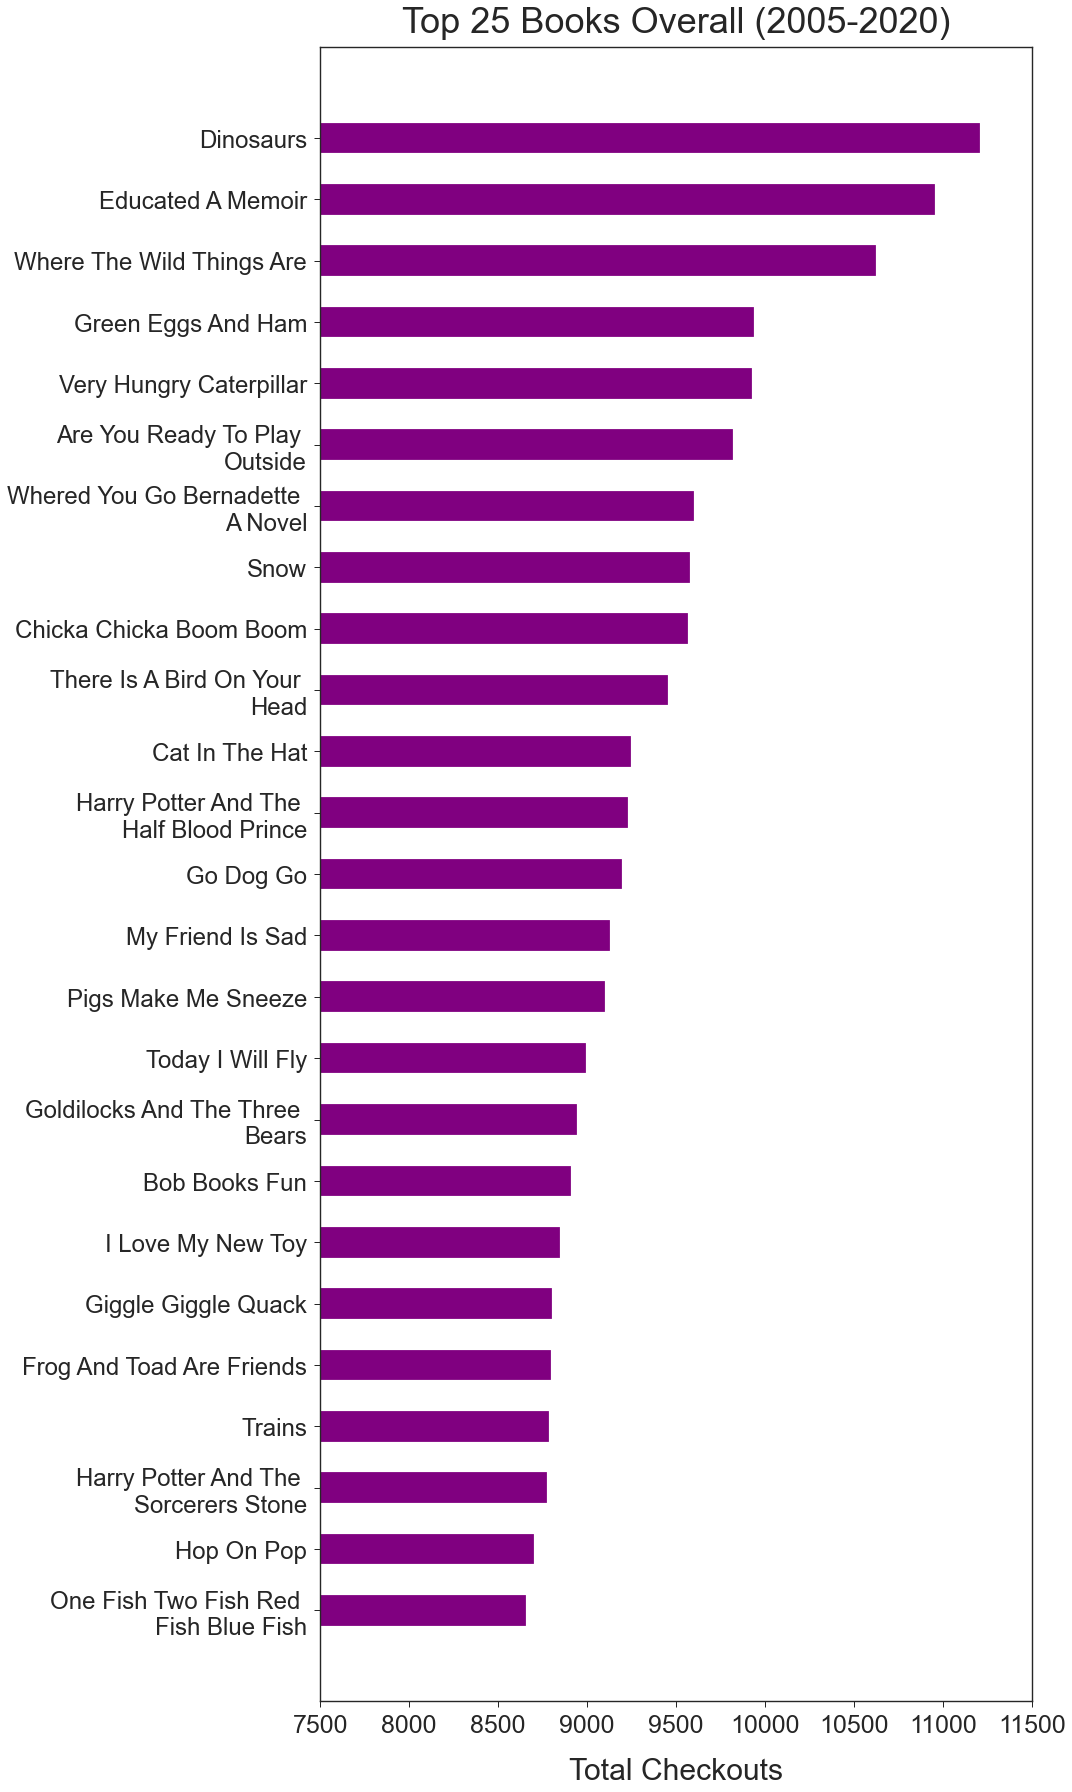

In [79]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=7500, right=11500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top25_books.index][::-1], top25_books.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

#### Top 25 Books - Adult

In [61]:
%%time

top25_books_adult = df_full[(df_full.format_subgroup == 'Book') &
                            (df_full.age_group == 'Adult')].title.value_counts().head(25)

top25_books_adult

CPU times: user 16.6 s, sys: 34.9 s, total: 51.5 s
Wall time: 1min 16s


Educated a memoir                                                                            10958
Whered you go Bernadette a novel                                                              9600
Where the crawdads sing                                                                       8652
Becoming                                                                                      8410
omnivores dilemma a natural history of four meals                                             7758
help                                                                                          7675
All the light we cannot see a novel                                                           7617
Gone girl a novel                                                                             7496
girl with the dragon tattoo                                                                   7402
Quiet the power of introverts in a world that cant stop talking                               7361
Never let 

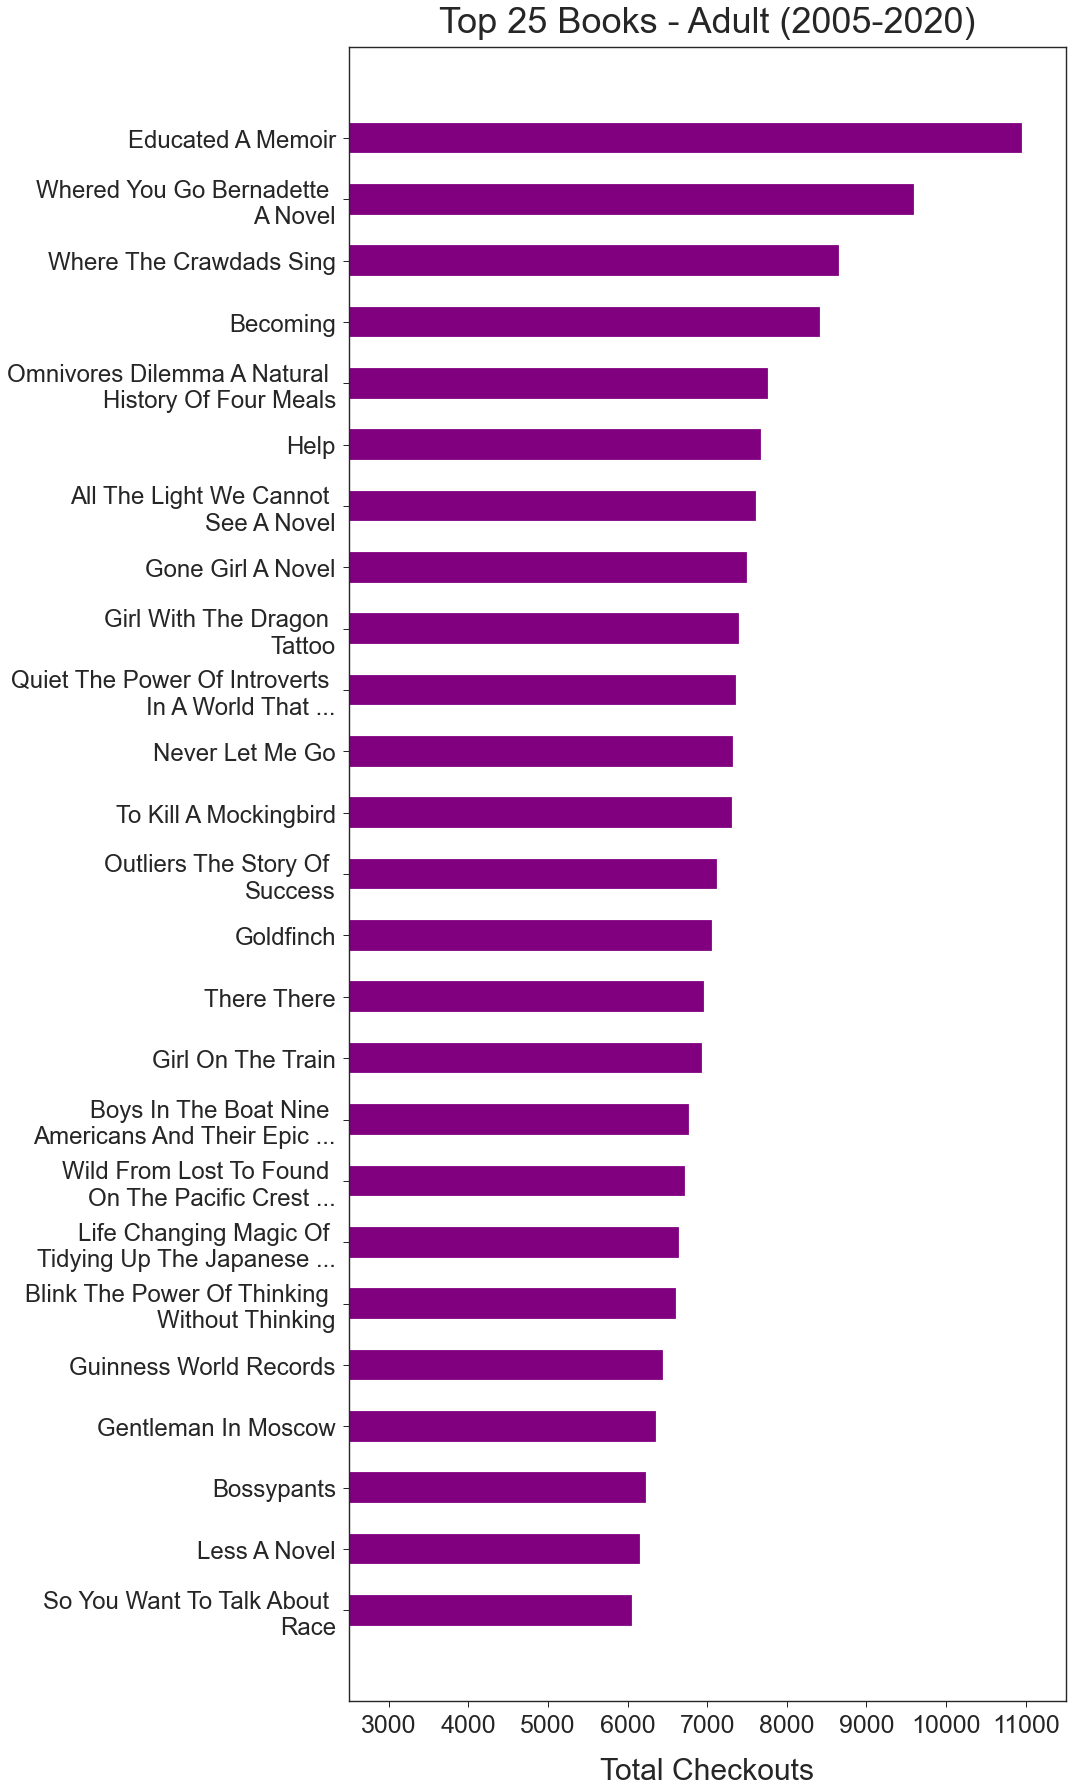

In [74]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 adult books
plt.barh([name_beautifier(x) for x in top25_books_adult.index][::-1],
         top25_books_adult.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- 7 out of the top 10 are female authors.
    - 14 out of 25 female authors, 10 out of 25 male authors, and 1 anthology (`Guinness Book of World Records`).
    - Again, it is impossible to determine whether this means females are more active than males at the library, for a variety of reasons, not least of which is that the gender of the author does not directly correlate with the the gender of the reader.
- Malcolm Gladwell appears on here twice, the only author to do so (`Outliers` and `Blink`).
- I'd like to further break this down into fiction and nonfiction. It appears that both are fairly well represented in this list:
    - 13 out of 25 are `Fiction`.
    - 12 out of 25 are `Nonfiction`.

#### Top 25 Books - Teen

In [68]:
%%time

top25_books_teen = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Teen')].title.value_counts().head(25)

top25_books_teen

CPU times: user 1.34 s, sys: 3.65 s, total: 4.98 s
Wall time: 8.87 s


hunger games                                   8608
book thief                                     8435
Catching fire                                  7869
Mockingjay                                     7835
absolutely true diary of a part time Indian    7780
fault in our stars                             6504
Twilight                                       5832
Divergent                                      4793
New moon                                       4778
perks of being a wallflower                    4084
Eclipse                                        4037
graveyard book                                 3756
Breaking dawn                                  3716
catcher in the rye                             3606
Insurgent                                      3429
Uglies                                         3404
Eleanor Park                                   3376
maze runner                                    3345
Bone Vol 1 Out from Boneville                  3317
Allegiant   

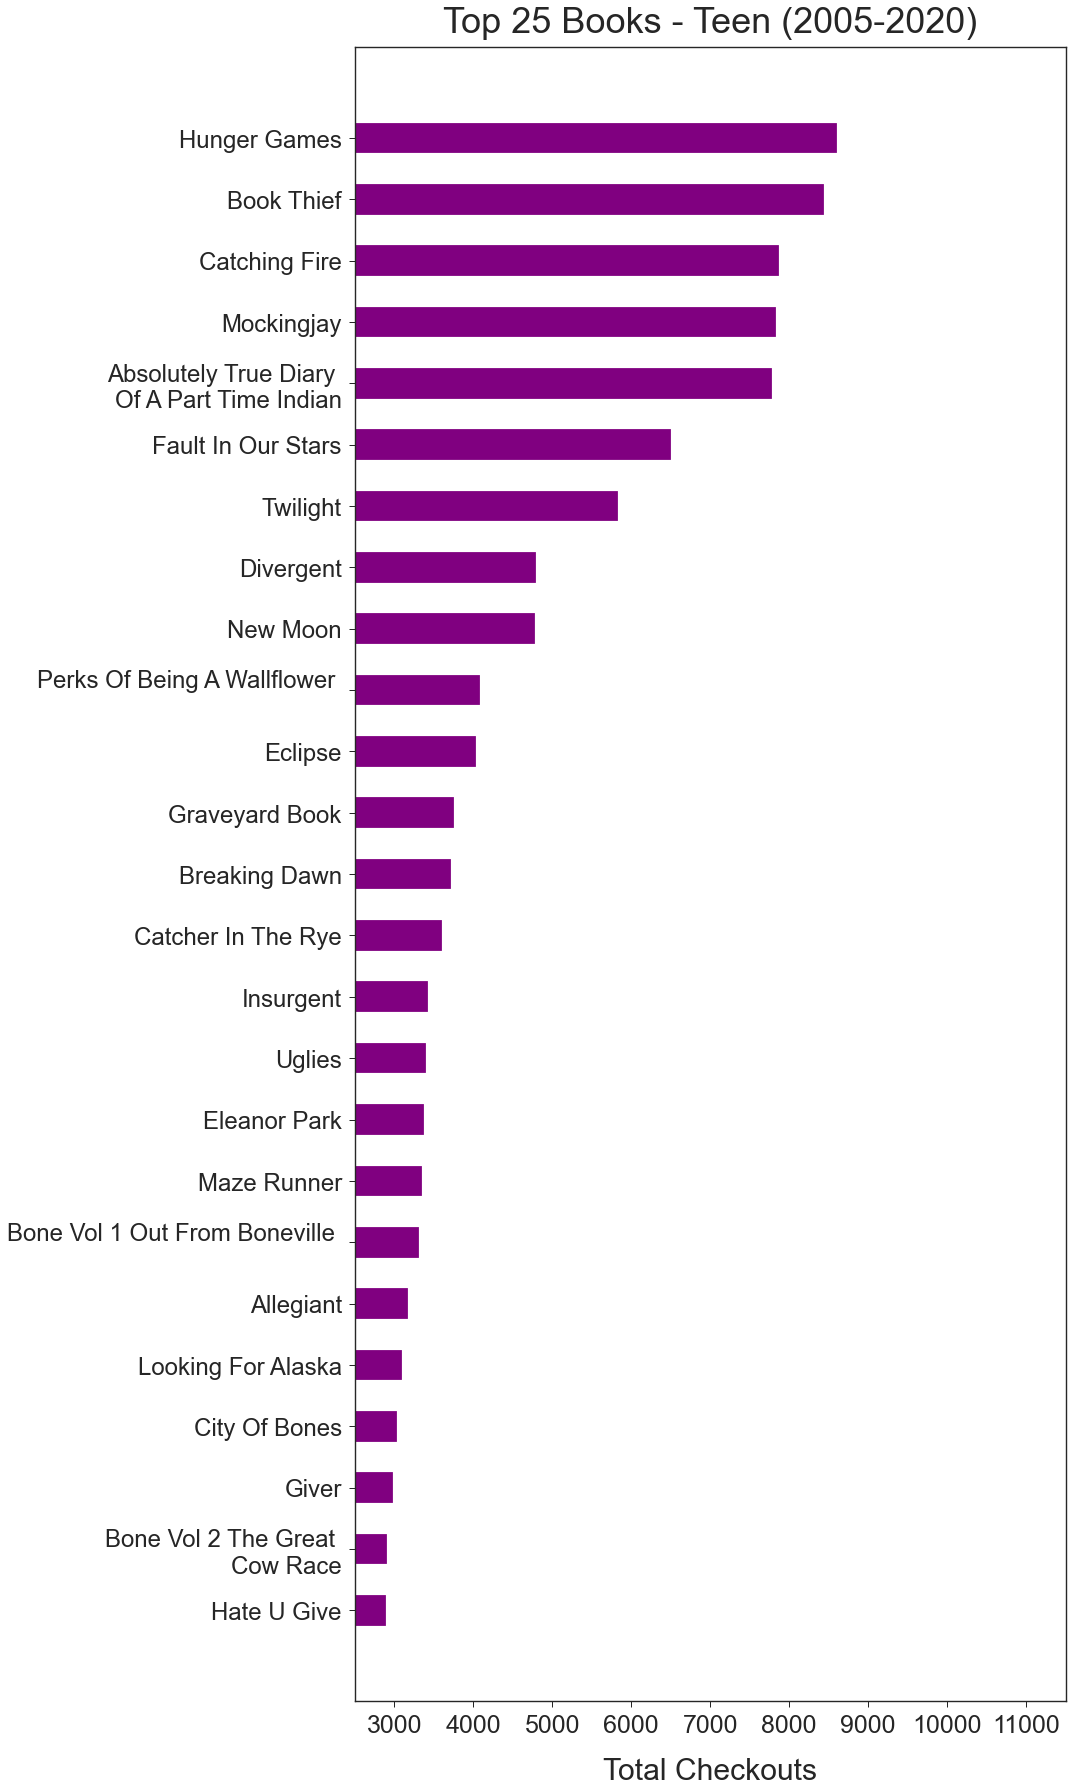

In [75]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Teen (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 teen books
plt.barh([name_beautifier(x) for x in top25_books_teen.index][::-1],
         top25_books_teen.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_teen_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

Not too many surprises here, with the Twilight and Hunger Games series dominating. Some other observations:
- A couple of John Green's books make the list (`The Fault in Our Stars` and `Looking for Alaska`).
- In my opinion, `Catcher in the Rye` is a bit of an edge case; it makes sense to me that it is classified as `Teen`, although I'm sure a fair amount of adults read it as well, although I suppose that can be said of most of these. I guess it's probably a lot of folks who forgot to read it in school and wanted to see what the hubbub was about.
- Sherman Alexie makes the list! with `The Absolutely True Diary of a Part-Time Indian`.
- I was expecting more comic books and graphic novels, but that distinction is held only by the the first two installations of the `Bone` comic books.
- Alas, no poetry.
- After the top 5, there is a notably steep decline in the popularity of the rest of the items on the list.

#### Top 25 Books - Juvenile (Children's Books)

In [71]:
%%time

top25_books_kids = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Juvenile')].title.value_counts().head(25)

top25_books_kids

CPU times: user 9.43 s, sys: 23.1 s, total: 32.5 s
Wall time: 51.7 s


Dinosaurs                                 11076
Where the wild things are                 10623
Green eggs and ham                         9937
very hungry caterpillar                    9926
Are you ready to play outside              9822
Chicka chicka boom boom                    9567
There is a bird on your head               9453
cat in the hat                             9246
Go dog go                                  9194
Harry Potter and the half blood prince     9172
My friend is sad                           9128
Pigs make me sneeze                        9096
Today I will fly                           8997
Goldilocks and the three bears             8918
Bob books fun                              8912
I love my new toy                          8846
Giggle giggle quack                        8804
Frog and Toad are friends                  8800
Trains                                     8784
Hop on Pop                                 8703
One fish two fish red fish blue fish    

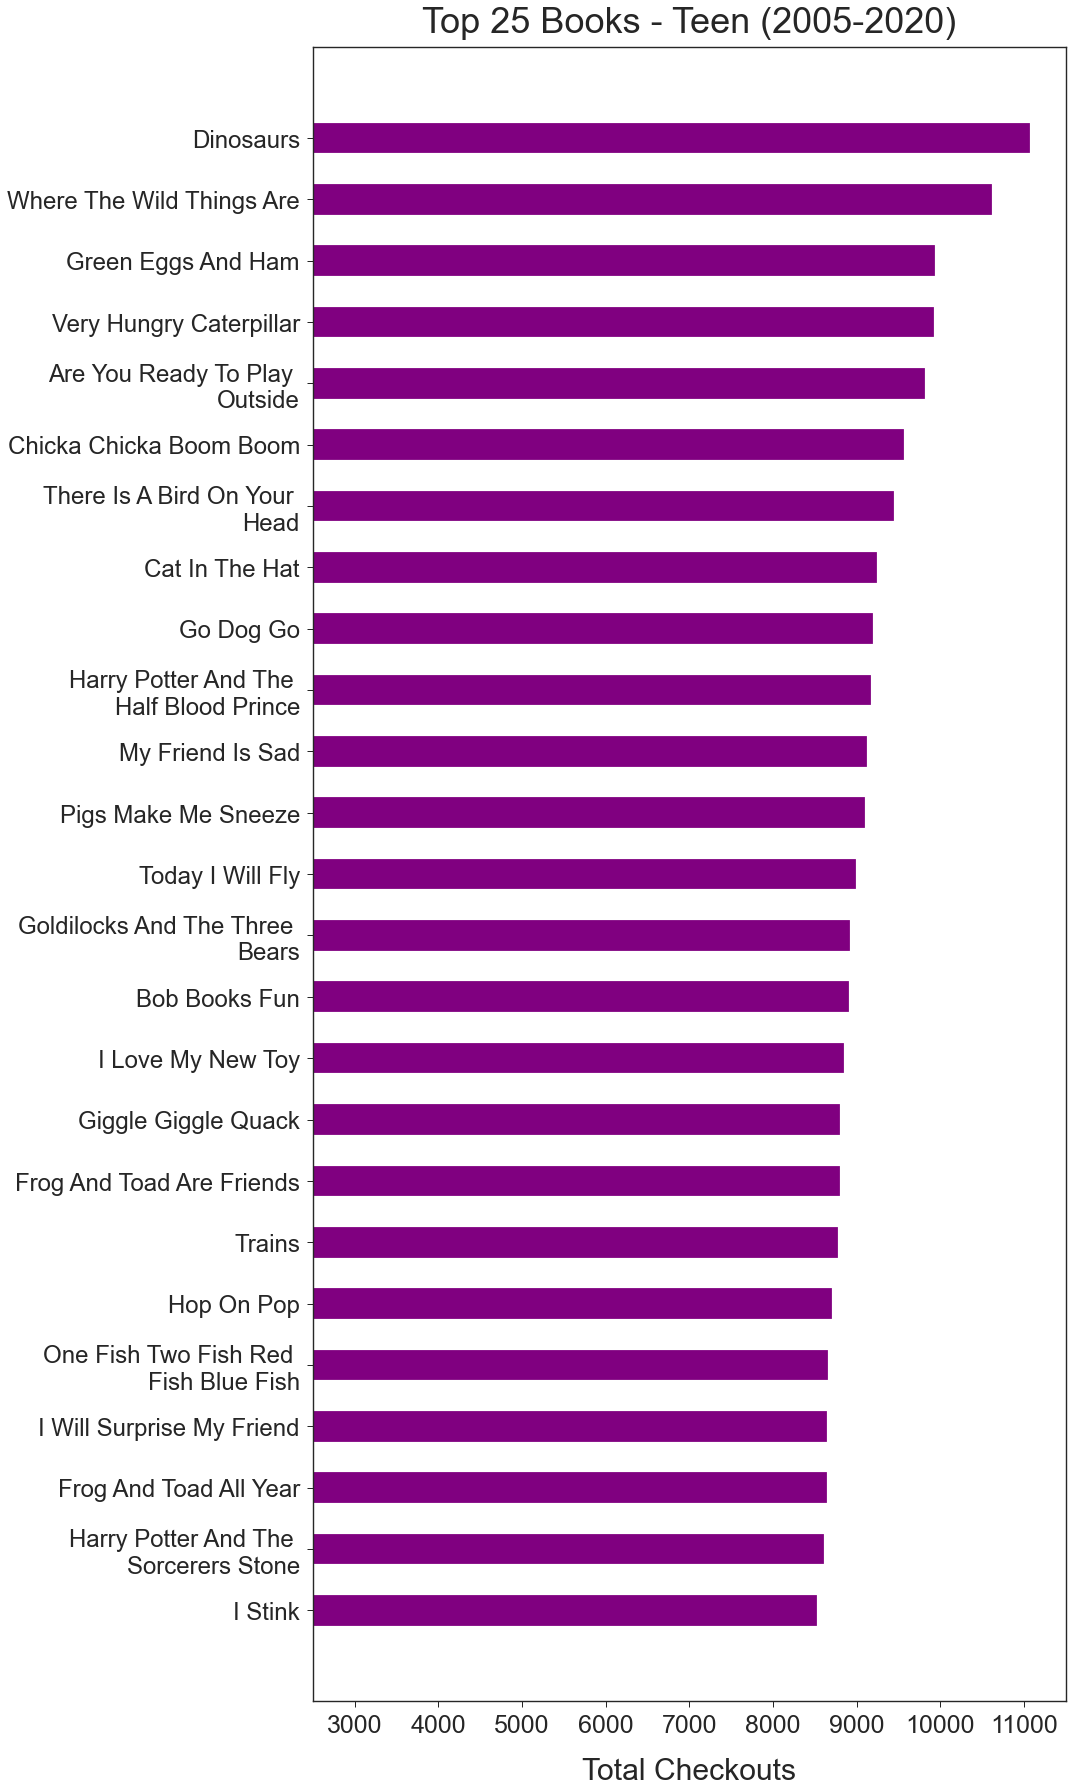

In [76]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Kids (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_kids.index][::-1],
         top25_books_kids.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_kids_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- It's unclear to me if `Dinosaurs` refers to a single book or if it is a series that is lumped together into a single title. My guess is it one of those larger, rather thin picture books.
- Harry Potter faces some stiff competition!
    - And I'm surprised that `The Half-Blood Prince` is the most checked out book in the series.
- Unsurprisingly, Dr. Seuss is well represented.
- Compared to `Adult` and `Teen` books, children's books have a much tighter range. Again, a possible reason for this is that they are such quick reads that they can either be re-read (re-checked out) numerous times or read alongside numerous other books within one trip to the library.

#### Top 25 Books - Adult Fiction

In [80]:
%%time

top25_books_adult_fiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Fiction')
                                ].title.value_counts().head(25)

top25_books_adult_fiction

[autoreload of functions.data_cleaning failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames

CPU times: user 5.9 s, sys: 11.4 s, total: 17.3 s
Wall time: 26 s


Whered you go Bernadette a novel                   9600
Where the crawdads sing                            8652
help                                               7675
All the light we cannot see a novel                7561
Gone girl a novel                                  7496
girl with the dragon tattoo                        7346
Never let me go                                    7322
To kill a mockingbird                              7305
goldfinch                                          7059
There there                                        6957
girl on the train                                  6938
gentleman in Moscow                                6362
Less a novel                                       6146
Pachinko                                           6014
Hotel on the corner of bitter and sweet a novel    6003
thousand splendid suns                             5971
overstory a novel                                  5887
kite runner                                     

- Lots of `Fiction` books appears to love calling attention to the fact that it is a novel.
- A fair amount of books from within series, as well as books that have either been turned into tv shows or movies.
    - Are they movies/shows because they were already popular as books? Or did movies/shows make them more popular as books? or both?
- A couple of classics, thinking specifically of `To Kill a Mockingbird` and ` The Great Gatsby`.

#### Top 25 Books - Adult Nonfiction

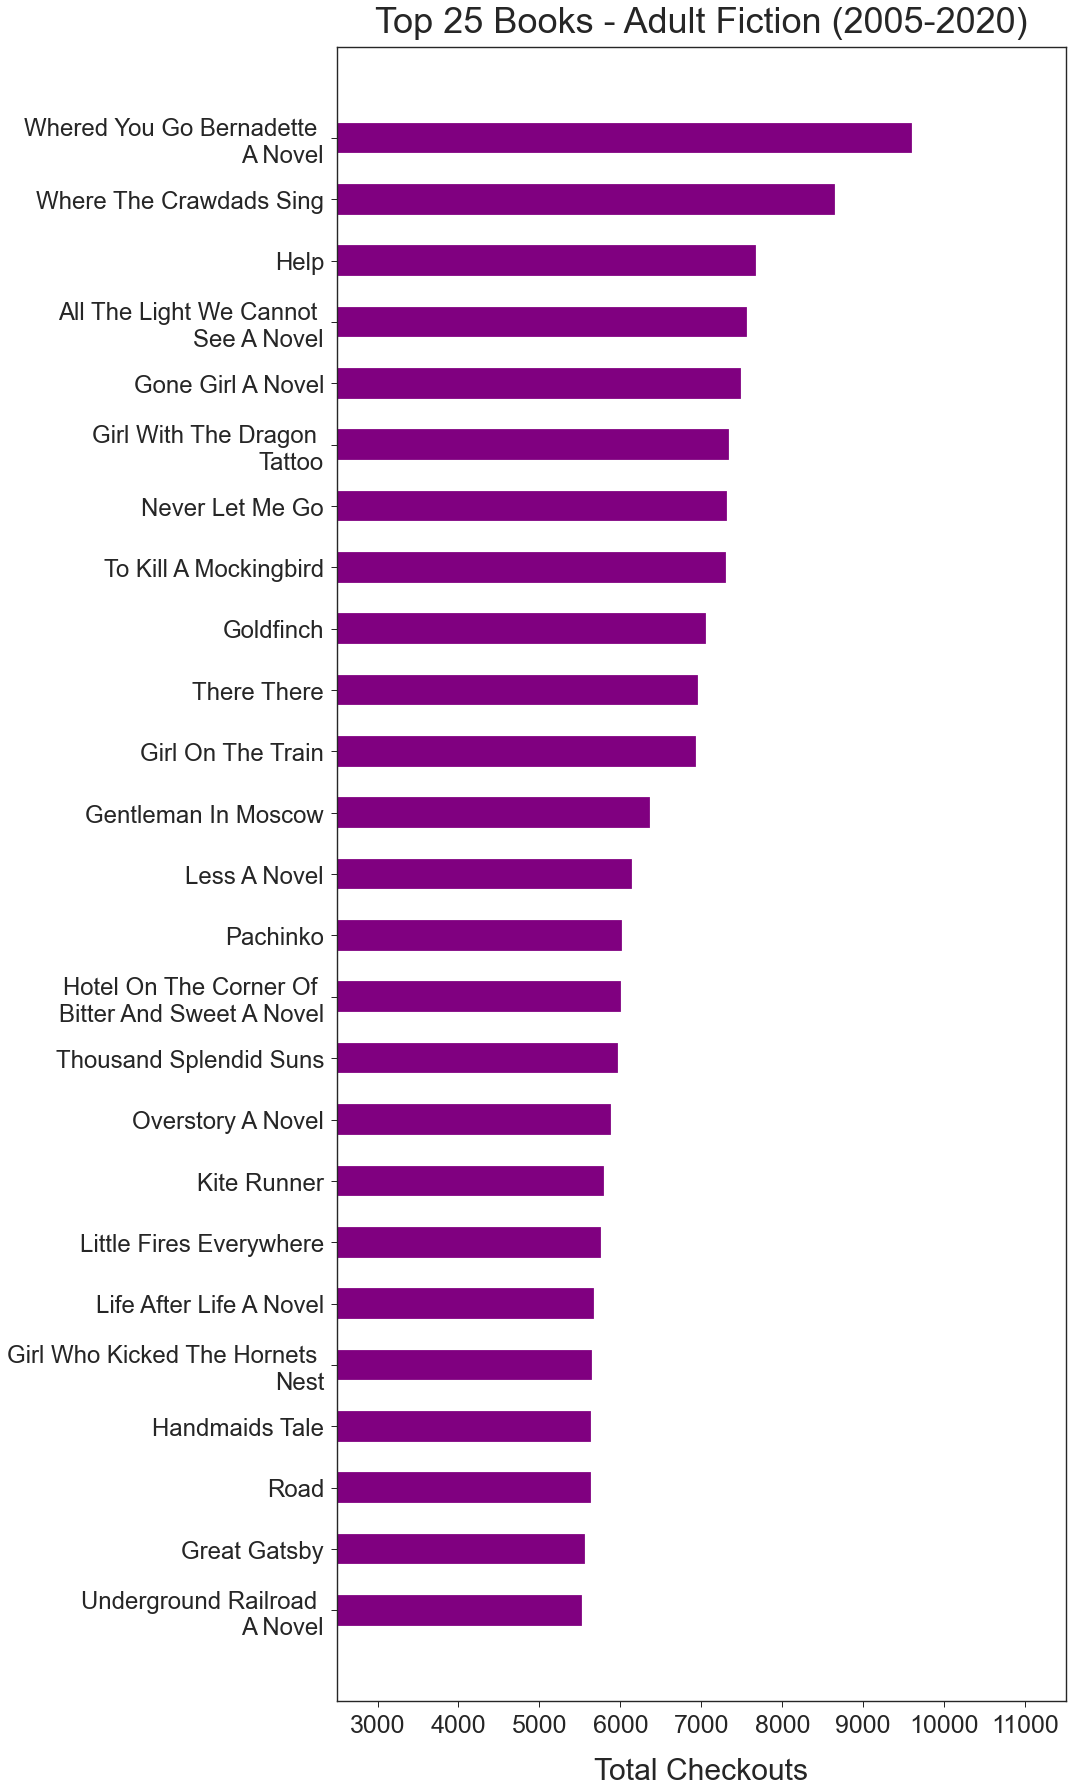

In [81]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Fiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_fiction.index][::-1],
         top25_books_adult_fiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_fiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

In [82]:
%%time

top25_books_adult_nonfiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Nonfiction')
                                    ].title.value_counts().head(25)

top25_books_adult_nonfiction

CPU times: user 7.19 s, sys: 9.59 s, total: 16.8 s
Wall time: 24.5 s


Educated a memoir                                                                                                                           10735
Becoming                                                                                                                                     8355
omnivores dilemma a natural history of four meals                                                                                            7617
Quiet the power of introverts in a world that cant stop talking                                                                              7269
Outliers the story of success                                                                                                                6929
boys in the boat nine Americans and their epic quest for gold at the 1936 Berlin Olympics                                                    6755
Wild from lost to found on the Pacific Crest Trail                                                                          

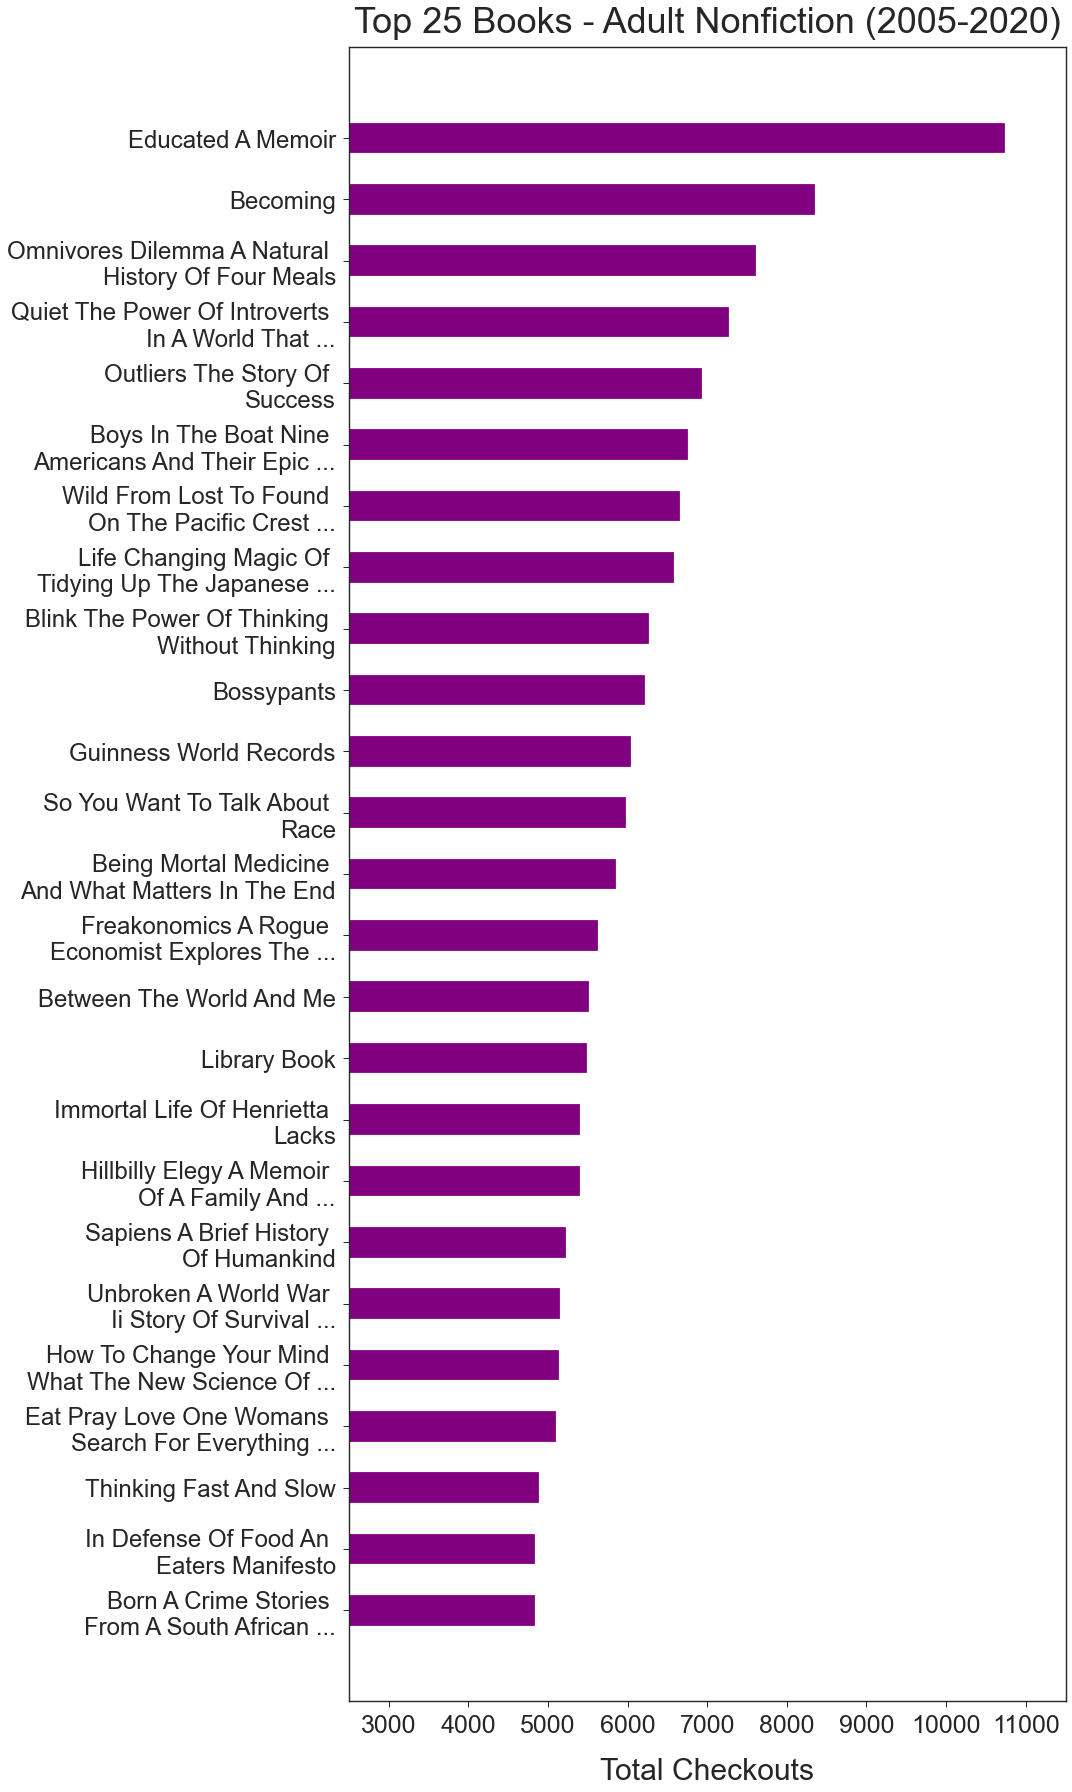

In [83]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Nonfiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_nonfiction.index][::-1],
         top25_books_adult_nonfiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_nonfiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

In [ ]:
please break code

In [18]:
%%time

df_full[df_full.title == 'Greatest hits'].sort_values('date').head(20)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
36950360,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990, Ro...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36841964,Greatest hits,"Rock music 1971 1980, Rock music 1961 1970",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36861318,Greatest hits,"Popular music 1951 1960, Popular music 1961 19...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36931813,Greatest hits,Rock music 1961 1970,2005-04-13,Media,Audio Disc,Nonfiction,Adult
37002937,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36938769,Greatest hits,"Folk music United States, Folk songs English U...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36793193,Greatest hits,"Contemporary Christian music, Gospel music",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36963817,Greatest hits,"Piano music Jazz, Jazz 1921 1930",2005-04-13,Media,Audio Disc,Nonfiction,Adult
70456703,Greatest hits,"Popular music Ireland 1991 2000, Popular music...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36956800,Greatest hits,"Rock music 1981 1990, Rock music 1961 1970",2005-04-14,Media,Audio Disc,Nonfiction,Adult


In [19]:
%%time

df_full[df_full.title == 'Greatest hits']['subjects'].unique()

CPU times: user 4.1 s, sys: 44.2 ms, total: 4.15 s
Wall time: 4.14 s


array(['Rock music 1971 1980', 'Rock music',
       'Rock music, Guitar music Rock',
       'Popular music 1971 1980, Popular music 1961 1970',
       'Rockabilly music, Rock music 1981 1990, Rock music 1991 2000',
       'Popular music 1971 1980', 'Popular music 1961 1970',
       'Popular music 1981 1990, Popular music 1991 2000',
       'Funk Music, Rock music 1961 1970, Popular music 1961 1970',
       'Popular music 1991 2000, Popular music 2001 2010',
       'Rock music 1971 1980, Rock music 1961 1970',
       'Rap Music, Popular music 1981 1990, Popular music 1991 2000',
       'Folk rock music, Rock music 1971 1980, Rock music 1961 1970',
       'Rock music 1981 1990, Rock music 1991 2000',
       'Rock music 1991 2000, Popular music 1991 2000',
       'Rock music 1971 1980, Rock music 1981 1990',
       'Rock music 1991 2000, Rock music 2001 2010',
       'Piano music Jazz, Jazz 1961 1970',
       'Rock music 1981 1990, Popular music 1981 1990',
       'Rock music 1971 1980, R

In [27]:
%%time

greatest_hits = df_full[df_full.title == 'Greatest hits']

In [28]:
music_genres = ['gospel', 'soul', 'operas', 'christian', 'reggae', 'humorous', 'orchestral', 
                'childrens', 'jazz', 'folk', 'piano', 'blues', 'country', 'rap', 'rock', 'popular']

In [43]:
%%time

conditions_1 = [
    greatest_hits.subjects.str.lower().str.startswith(genre) for genre in music_genres  
]

conditions_2 = [
    greatest_hits.subjects.str.lower().str.contains(genre) for genre in music_genres 
]

conditions = conditions_1 + conditions_2

choices = [f'{genre} music' for genre in music_genres] * 2

CPU times: user 2.04 s, sys: 207 ms, total: 2.25 s
Wall time: 2.48 s


In [44]:
%%time

greatest_hits['subjects'] = np.select(conditions, choices, 'other')

CPU times: user 15.1 ms, sys: 7.83 ms, total: 22.9 ms
Wall time: 33.5 ms


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
%%time

greatest_hits.subjects.value_counts()

CPU times: user 11.1 ms, sys: 696 µs, total: 11.8 ms
Wall time: 13.1 ms


rock music          41925
popular music       14205
rap music            5070
country music        4603
folk music           2431
jazz music           2197
soul music           1706
piano music           770
blues music           483
gospel music          142
christian music       112
operas music           87
orchestral music       86
childrens music        33
humorous music         33
reggae music           24
Name: subjects, dtype: int64

In [24]:
genre_2 = ['this', 'that', 'hello']

In [26]:
music_genres * 2

['rock',
 'popular',
 'rap',
 'folk',
 'piano',
 'blues',
 'jazz',
 'country',
 'soul',
 'gospel',
 'operas',
 'christian',
 'reggae',
 'humorous',
 'orchestral',
 'childrens',
 'rock',
 'popular',
 'rap',
 'folk',
 'piano',
 'blues',
 'jazz',
 'country',
 'soul',
 'gospel',
 'operas',
 'christian',
 'reggae',
 'humorous',
 'orchestral',
 'childrens']

In [14]:
%%time

df_full[df_full.title == 'Greatest hits']['subjects'].value_counts().head(20)

CPU times: user 4.03 s, sys: 23.1 ms, total: 4.06 s
Wall time: 4.05 s


Rock music                                                                                      10763
Rock music 1971 1980, Rock music 1981 1990                                                       7254
Rock music 1981 1990, Rock music 1991 2000                                                       2753
Popular music 1981 1990, Popular music 1991 2000                                                 2712
Rock music 1991 2000, Rock music 2001 2010                                                       2123
Rock music 1971 1980, Rock music 1961 1970                                                       2042
Rap Music, Popular music 1991 2000                                                               1800
Rap Music                                                                                        1722
Country music 1991 2000, Country music 2001 2010                                                 1639
Rock music 1971 1980, Rock music 1981 1990, Popular music 1981 1990, Popular music

In [15]:
%%time

df_full[df_full.title == 'Greatest hits']['format_group'].value_counts()

CPU times: user 4.05 s, sys: 28.1 ms, total: 4.08 s
Wall time: 4.08 s


Media         73247
Print           660
Other             0
Equipment         0
Electronic        0
Name: format_group, dtype: int64

In [9]:
df_full[df_full.title == 'SPL HotSpot connecting Seattle'].head(10)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
19752051,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-09-01,Print,Book,Nonfiction,Adult
19752202,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-15,Print,Book,Nonfiction,Adult
19752518,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-09,Print,Book,Nonfiction,Adult
19752679,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-22,Print,Book,Nonfiction,Adult
19752807,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-11-23,Print,Book,Nonfiction,Adult
19752884,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-12-09,Print,Book,Nonfiction,Adult
19753114,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-10-28,Print,Book,Nonfiction,Adult
19753541,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-12,Print,Book,Nonfiction,Adult
19753614,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-17,Print,Book,Nonfiction,Adult
19753933,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-29,Print,Book,Nonfiction,Adult


In [11]:
%%time

df_full[df_full.title == 'SPL HotSpot connecting Seattle'].groupby('date').size().tail(10)

CPU times: user 3.95 s, sys: 24.6 ms, total: 3.97 s
Wall time: 3.97 s


date
2020-12-05    11
2020-12-06     3
2020-12-07     2
2020-12-08    10
2020-12-09     7
2020-12-10    10
2020-12-11     4
2020-12-12    21
2020-12-13     2
2020-12-14     2
dtype: int64

## GRAVEYARD

CPU times: user 2.47 s, sys: 1.13 s, total: 3.6 s
Wall time: 3.82 s


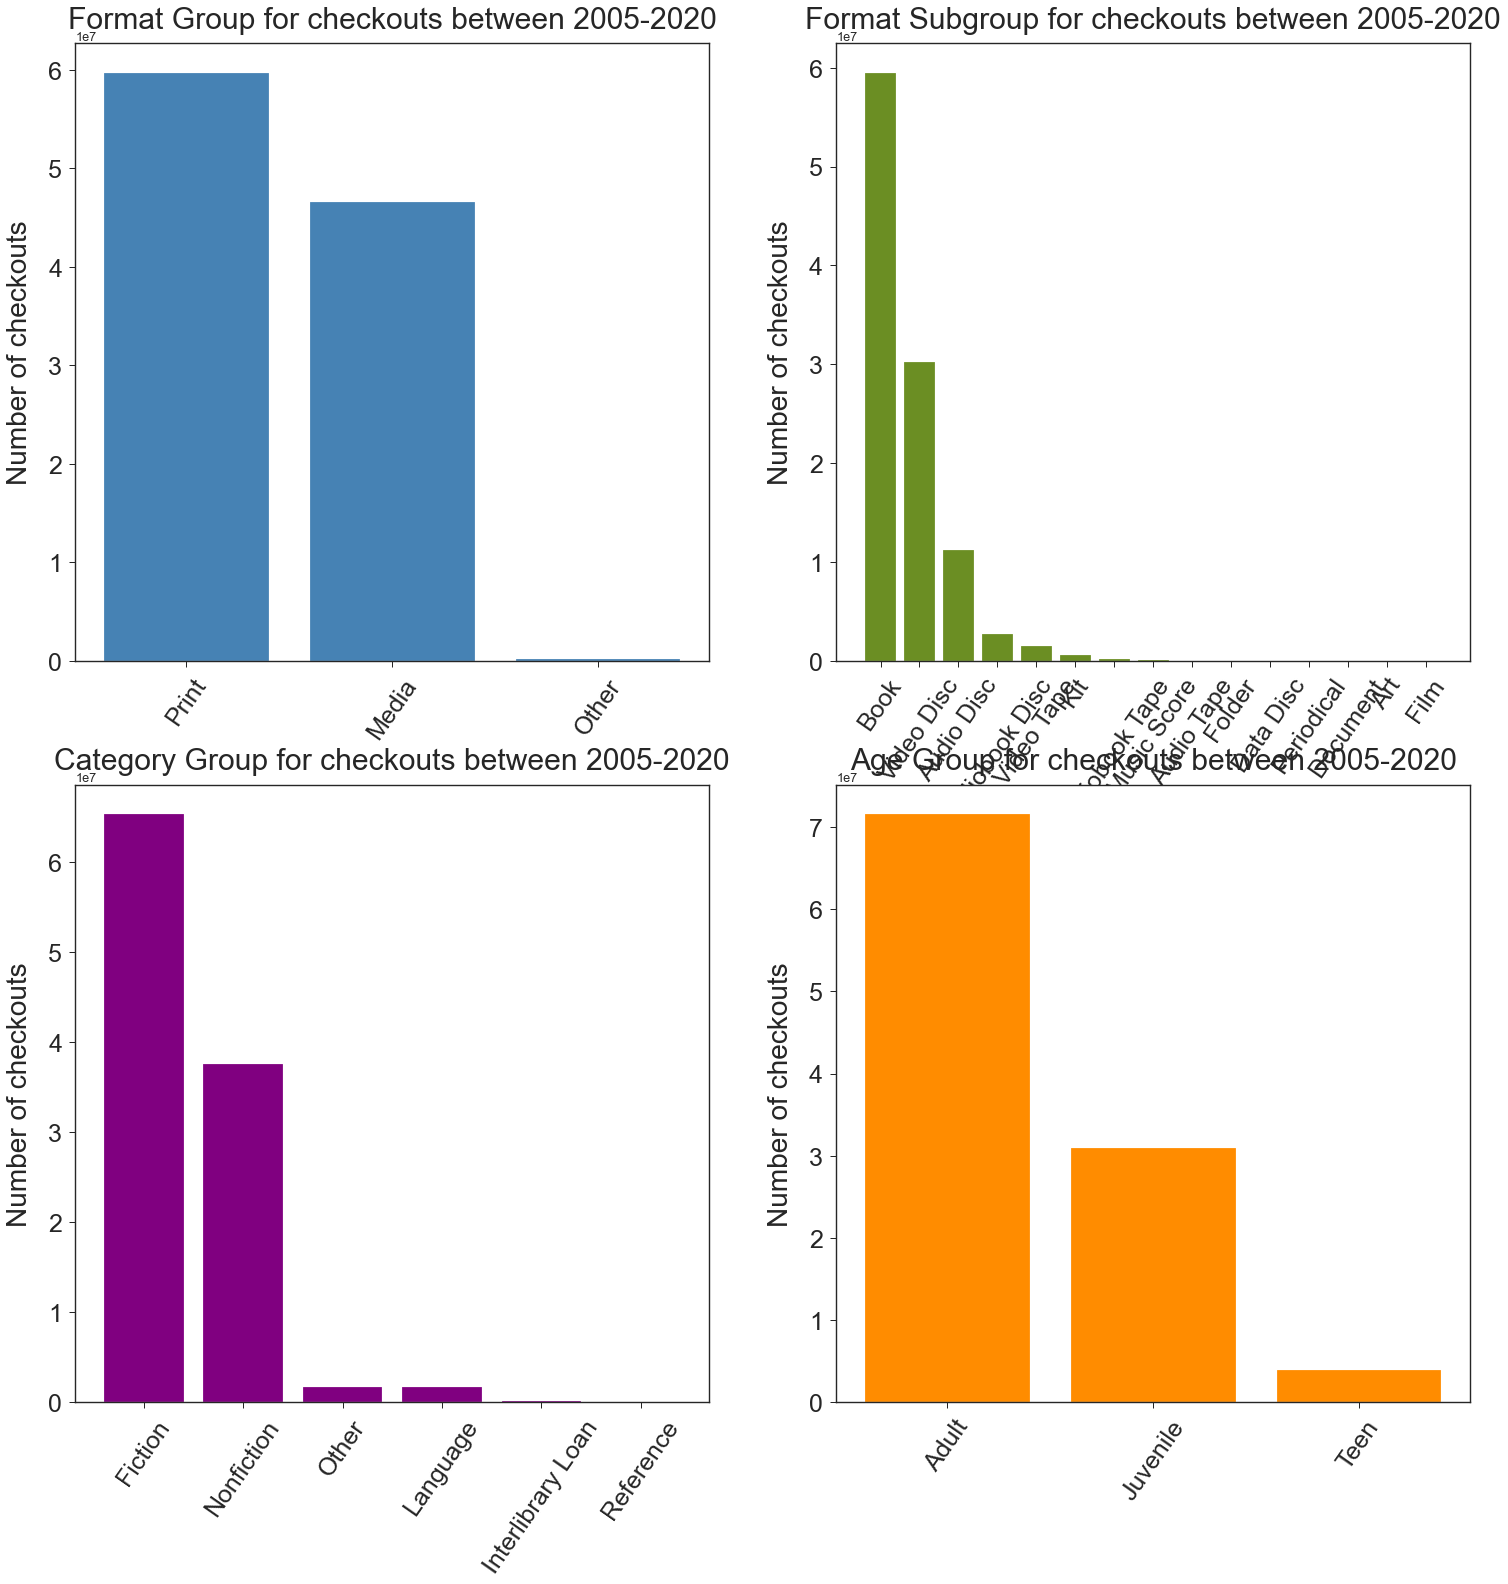

In [53]:
%%time

plt.figure(figsize=(25,25))

cols = ['format_group', 'format_subgroup', 'category_group', 'age_group']

for i, col in enumerate(cols):
    
    # count values in the column
    col_counts = df_full[col].value_counts()

    # set dimension of plots
    nrows = 2
    ncols = 2

    # list of colors
    colors = ['steelblue', 'olivedrab', 'purple', 'darkorange']
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'{col.title().replace("_", " ")} for checkouts between 2005-2020', 
              fontsize=30, pad=15, x=0.5, y=1)
    plt.ylabel('Number of checkouts', fontsize=28, labelpad=15)
    plt.xticks(rotation=55, fontsize=25)
    plt.yticks(fontsize=25)
    plt.bar(col_counts.index, col_counts.values, color=colors[i])
              
# # uncomment to save
# plt.savefig('charts/top25_words_movement_bar.png', 
#             bbox_inches='tight', transparent=True)

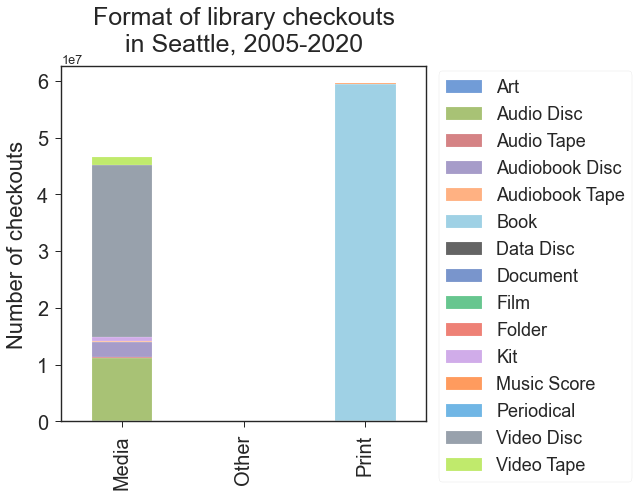

In [103]:
# proportion of end rhymes across movements
format_subgroup_dist = df_full.groupby('format_group').format_subgroup.\
    value_counts().unstack()

# plot the graph
format_subgroup_dist.plot(kind='bar', stacked=True, figsize=(9,7),
#                           color=['darkorange', 'royalblue'], 
                          alpha=.70, fontsize=14)

# prettify the graph
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=25, pad=15)
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Number of checkouts', 
           fontsize=22, labelpad=10)

# plot the labels and and legends
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.legend(format_subgroup_dist.columns, facecolor='white', 
           framealpha=1, bbox_to_anchor=(1.01, 1.01), 
           fontsize=18)

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/end_rhymes_stackedbar.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

In [22]:
%%time

df_full.dropna(subset=['title'])[df_full.dropna(subset=['title']).title.str.contains('Uncataloged Folder or Bag')].title.value_counts()

CPU times: user 2min 15s, sys: 8min 49s, total: 11min 4s
Wall time: 20min 45s


Uncataloged Folder or Bag BAL        22608
Uncataloged Folder or Bag DWN        22504
Uncataloged Folder or Bag GWD        17344
Uncataloged Folder or Bag NET        17188
Uncataloged Folder or Bag WTS        12658
Uncataloged Folder or Bag BRO        12617
Uncataloged Folder or Bag LCY        11979
Uncataloged Folder or Bag NGA        11848
Uncataloged Folder or Bag MAG        11331
Uncataloged Folder or Bag QNA        11187
Uncataloged Folder or Bag SWT        11134
Uncataloged Folder or Bag BEA        10753
Uncataloged Folder or Bag CAP        10362
Uncataloged Folder or Bag COL        10160
Uncataloged Folder or Bag GLK         9996
Uncataloged Folder or Bag UNI         7869
Uncataloged Folder or Bag WAL         6976
Uncataloged Folder or Bag RBE         6524
Uncataloged Folder or Bag IDC         6446
Uncataloged Folder or Bag MON         6412
Uncataloged Folder or Bag DTH         6303
Uncataloged Folder or Bag HIP         5971
Uncataloged Folder or Bag FRE         5741
Uncataloged

In [111]:
%%time

df_full[df_full.format_subgroup == 'Video Disc'].title.value_counts().head(25)

CPU times: user 11.5 s, sys: 27.4 s, total: 38.9 s
Wall time: 58.8 s


Into the wild                      19011
Michael Clayton                    17334
Burn after reading                 17049
Darjeeling Limited                 16481
Atonement                          16363
No country for old men             16285
reader                             16151
Doubt                              16133
Vicky Cristina Barcelona           15818
other Boleyn girl                  15664
Juno                               15571
curious case of Benjamin Button    15287
Slumdog millionaire                15253
WALL E                             14991
Gone baby gone                     14662
Milk                               14424
Savages                            14175
Once                               14128
Charlie Wilsons war                13862
Rachel getting married             13799
Becoming Jane                      13729
Mamma mia                          13710
golden compass                     13662
kite runner                        13541
Quantum of solac

In [116]:
df_full[df_full.title == 'SPL HotSpot connecting Seattle'].head(20)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
19752051,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-09-01,Print,Book,Nonfiction,Adult
19752202,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-15,Print,Book,Nonfiction,Adult
19752518,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-09,Print,Book,Nonfiction,Adult
19752679,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-22,Print,Book,Nonfiction,Adult
19752807,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-11-23,Print,Book,Nonfiction,Adult
19752884,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-12-09,Print,Book,Nonfiction,Adult
19753114,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-10-28,Print,Book,Nonfiction,Adult
19753541,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-12,Print,Book,Nonfiction,Adult
19753614,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-17,Print,Book,Nonfiction,Adult
19753933,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-29,Print,Book,Nonfiction,Adult


In [109]:
df_full[df_full.title == 'FlexTech Laptops'].head(20)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
105484757,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484758,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484761,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484766,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484767,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484768,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484769,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484772,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484774,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult
105484778,FlexTech Laptops,"Laptop computers, iPad Computer, Tablet computers",2018-07-02,Print,Book,Reference,Adult


In [115]:
df_full[df_full.title == 'Uncataloged Folder or Bag BAL'].head(20)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
84618037,Uncataloged Folder or Bag BAL,NaN,2010-08-10,Media,Kit,Other,Adult
84618048,Uncataloged Folder or Bag BAL,NaN,2009-08-29,Media,Kit,Other,Adult
84618057,Uncataloged Folder or Bag BAL,NaN,2010-01-25,Media,Kit,Other,Adult
84618093,Uncataloged Folder or Bag BAL,NaN,2008-08-07,Media,Kit,Other,Adult
84618109,Uncataloged Folder or Bag BAL,NaN,2009-04-22,Media,Kit,Other,Adult
84618111,Uncataloged Folder or Bag BAL,NaN,2010-11-28,Media,Kit,Other,Adult
84618115,Uncataloged Folder or Bag BAL,NaN,2010-06-17,Media,Kit,Other,Adult
84618123,Uncataloged Folder or Bag BAL,NaN,2009-11-21,Media,Kit,Other,Adult
84618128,Uncataloged Folder or Bag BAL,NaN,2008-03-17,Media,Kit,Other,Adult
84618148,Uncataloged Folder or Bag BAL,NaN,2010-05-10,Media,Kit,Other,Adult


In [8]:
df_full[df_full.title == 'In Building Device Checkout'].head(20)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
105467674,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-11-22,Print,Book,Reference,Adult
105467675,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-12-29,Print,Book,Reference,Adult
105467695,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-11-24,Print,Book,Reference,Adult
105467696,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-12-31,Print,Book,Reference,Adult
105467699,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-12-14,Print,Book,Reference,Adult
105467703,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-12-28,Print,Book,Reference,Adult
105467710,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-11-23,Print,Book,Reference,Adult
105467725,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-12-23,Print,Book,Reference,Adult
105467730,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-12-01,Print,Book,Reference,Adult
105467732,In Building Device Checkout,"Laptop computers, iPad Computer, Tablet computers",2015-12-01,Print,Book,Reference,Adult
